<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/convex-optimization/blob/main/disck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cvxpy  as cp
import disks_data as disk
import numpy as np

C = cp.Variable([disk.n, 2])
R = cp.Variable(disk.n)


best area:  210.76672729119494


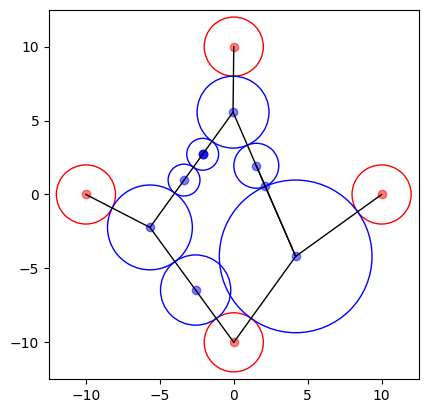

best perimeter:  139.3459777852028


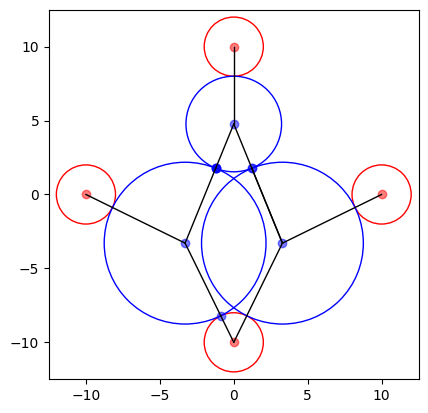

In [7]:
min_area_obj = cp.Minimize(cp.sum_squares(R))
min_perim_obj = cp.Minimize(sum(R))

cp.constraints = [R >= 0]
cp.constraints += [C[:disk.k,:] == disk.Cgiven[:disk.k,:]]

cp.constraints += [R[:disk.k] == disk.Rgiven[:disk.k]]

for i in range(0, len(disk.Gindexes)):
   cp.constraints += [cp.norm(C[disk.Gindexes[i, 0],:]-C[disk.Gindexes[i, 1],:])<= (R[disk.Gindexes[i, 0]]+R[disk.Gindexes[i, 1]])]

min_total_area = cp.Problem(min_area_obj, cp.constraints)

min_total_perim = cp.Problem(min_perim_obj, cp.constraints)

opt_area = min_total_area.solve()

print ('best area: ', np.pi*opt_area)
disk.plot_disks(C.value, R.value, disk.Gindexes, name = 'areas')

opt_peri = min_total_perim.solve()
print ('best perimeter: ', 2*np.pi*opt_peri)
disk.plot_disks(C.value, R.value, disk.Gindexes, name = 'perimeters')